In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_to_file = "G:\Other computers\My Laptop\Gsolar_Rimsha\Rimsha Fatima - Personal\Projects\EDA & Multilinear Regression\petrol_consumption.csv"
data = pd.read_csv(path_to_file)

In [4]:
data.describe().round(2)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.00,48.00,48.00,48.00,48.00
mean,7.67,4241.83,5565.42,0.57,576.77
std,0.95,573.62,3491.51,0.06,111.89
min,5.00,3063.00,431.00,0.45,344.00
25%,7.00,3739.00,3110.25,0.53,509.50
50%,7.50,4298.00,4735.50,0.56,568.50
75%,8.12,4578.75,7156.00,0.60,632.75
max,10.00,5342.00,17782.00,0.72,968.00


In [5]:
data.head

<bound method NDFrame.head of     Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.00            3571            1976                         0.525   
1         9.00            4092            1250                         0.572   
2         9.00            3865            1586                         0.580   
3         7.50            4870            2351                         0.529   
4         8.00            4399             431                         0.544   
5        10.00            5342            1333                         0.571   
6         8.00            5319           11868                         0.451   
7         8.00            5126            2138                         0.553   
8         8.00            4447            8577                         0.529   
9         7.00            4512            8507                         0.552   
10        8.00            4391            5939                         0.530   
11        

In [6]:
data.shape

(48, 5)

In [7]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

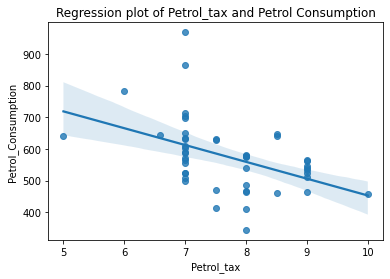

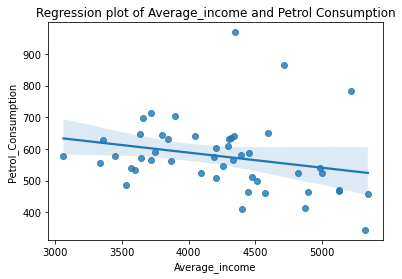

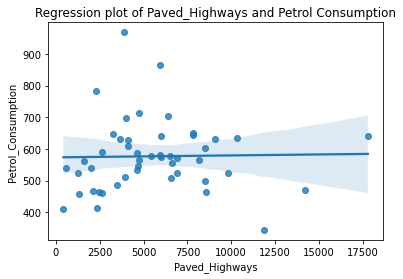

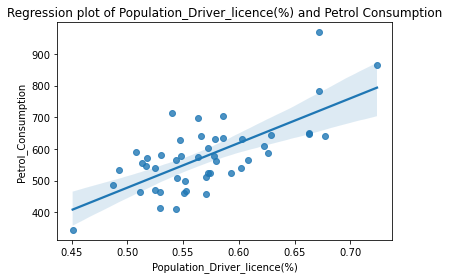

In [8]:
variable = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']
for var in variable:
    plt.figure()
    sns.regplot(x=var, y = 'Petrol_Consumption' , data = data).set(title=f'Regression plot of {var} and Petrol Consumption');

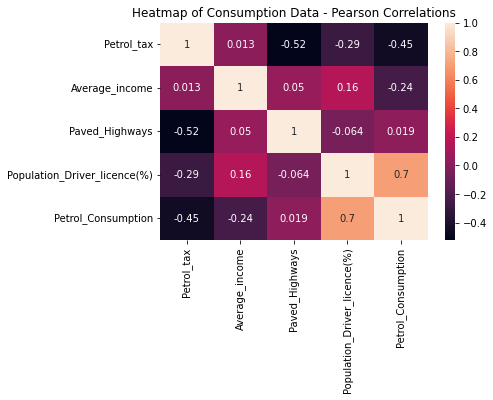

In [9]:
correlations = data.corr()
sns.heatmap(correlations, annot = True).set(title= 'Heatmap of Consumption Data - Pearson Correlations');

In [10]:
#As we can see that there are lots of outliers and extreme values present in the data and it may give inacurate results to first of all we should clean the data

In [11]:
#Lets plot the multilinear regression
x = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [15]:
regressor.intercept_

361.45087906652986

In [40]:
regressor.coef_

0.6712719785796507


In [24]:
features_name = x.columns
model_coefficients = regressor.coef_

coefficients_data = pd.DataFrame(data =model_coefficients, index = features_name, columns = ['Coefficient_values'])
coefficients_data

,Coefficient_values
Petrol_tax,-36.993746
Average_income,-0.056536
Paved_Highways,-0.004382
Population_Driver_licence(%),1346.869298


In [28]:
#For predictions
y_pred = regressor.predict(x_test)

In [32]:
results = pd.DataFrame({'Actual': y_test ,'Predicted': y_pred})
results

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 53.47
Mean squared error: 4083.26
Root mean squared error: 63.90


In [44]:
regressor.score(x_test,y_test)

0.3913664001428869

In [45]:
regressor.score(x_train,y_train)

0.7068781342155135